<a href="https://colab.research.google.com/github/chmnzz/fintech10/blob/main/ML_day7/0_dimension_reduction_(PCA%2Ckernel_PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
- 차원 축소란 데이터를 더 적은 차원으로 표현하는 과정입니다.
- 우리가 다루는 데이터는 종종 수백 또는 수천 개의 특성(변수)을 포함하지만, 이러한 고차원 데이터는 시각화가 어렵고 분석에도 시간이 많이 걸릴 수 있습니다.
- 차원 축소는 데이터의 핵심 정보를 보존하면서 데이터의 차원을 줄여 분석을 용이하게 만듭니다.

####    1. Import the wine data set

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://raw.githubusercontent.com/SLCFLAB/Data-Science-Python/main/Day%208/data/wine.data', header=None) #각자 알맞은 wine.data 파일 경로 입력

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df_wine['Class label'].value_counts()

,count
Class label,
2,71
1,59
3,48


####    2. Split the data into 70% training and 30% test subsets

In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0) #7:3으로 분할

####    3. Standardize the data
- PCA는 데이터 스케일에 민감

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) #training set의 parameter를 사용하여 test set의 데이터도 변환.

####    4. Calculate the covariance matrix and eigenvalues
-  PCA 수행 전에 공분산 행렬을 계산하여 데이터의 분산을 분석하고,고유값과 고유벡터를 구해 데이터의 주요 변동 방향을 확인합니다.
- 고유값이 클수록 해당 주성분이 데이터의 분산을 더 많이 설명함.
- 첫 번째 두 개의 고유값 (4.84, 2.42)이 가장 크며, 이 두 성분이 대부분의 변동성을 차지함.이후의 고유값은 급격히 감소하므로, 주요 정보는 소수의 성분에 집중됨.
- 따라서 PCA에서 n_components=2로 설정하면 데이터의 대부분의 정보를 유지하면서 차원을 줄일 수 있음.

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T) #공분산 행렬 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print(eigen_vecs.shape)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
(13, 13)


####   5. Calculate and plot the explained variance

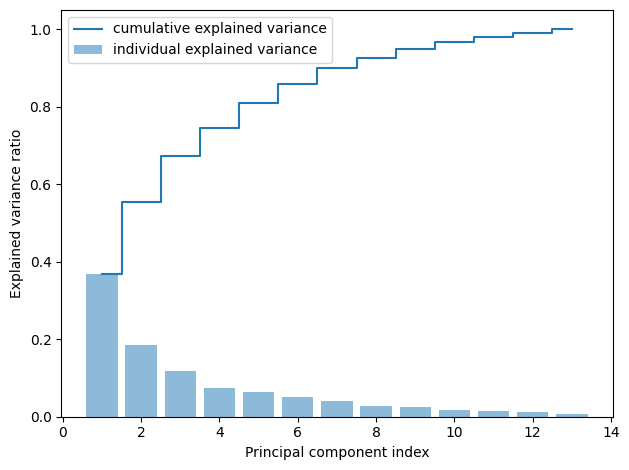

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] #크기 순으로 정렬
cum_var_exp = np.cumsum(var_exp) #누적 합산

import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

####    6. Feature transformation

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print(eigen_pairs[0])
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

(4.8427453156558915, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651]))
Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


####    6-1 plot the new matrix X'

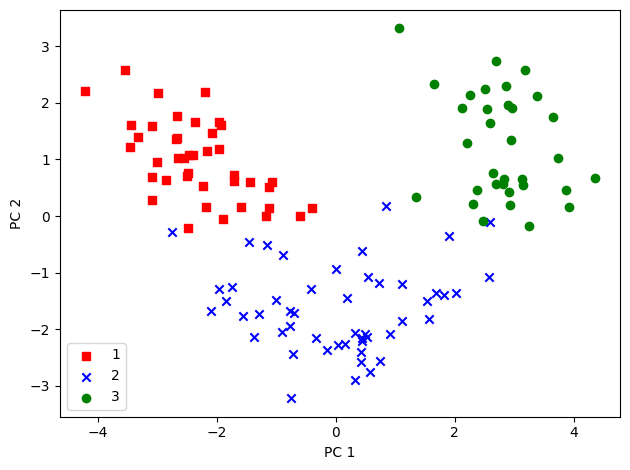

In [8]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Principal component analysis in scikit-learn

In [9]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_pca = pca.fit_transform(X_train_std)
 #정규화된 데이터를 사용
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

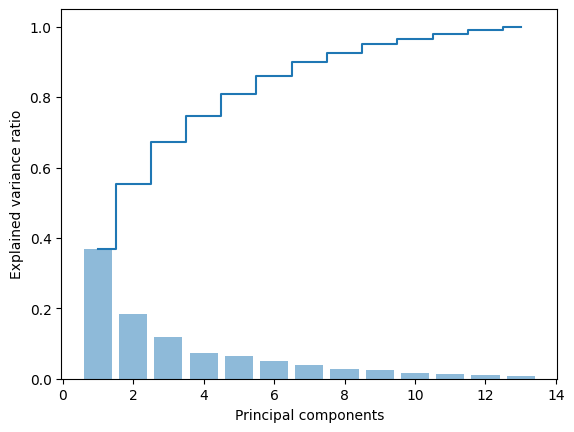

In [10]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [11]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

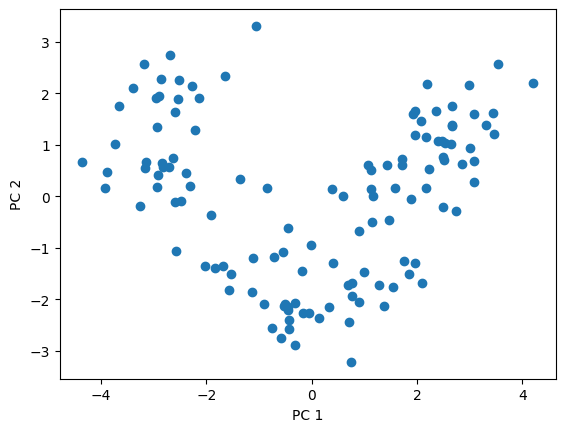

In [12]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## k-means

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels_train = kmeans.fit_predict(X_train_pca)
kmeans_labels_test = kmeans.predict(X_test_pca)

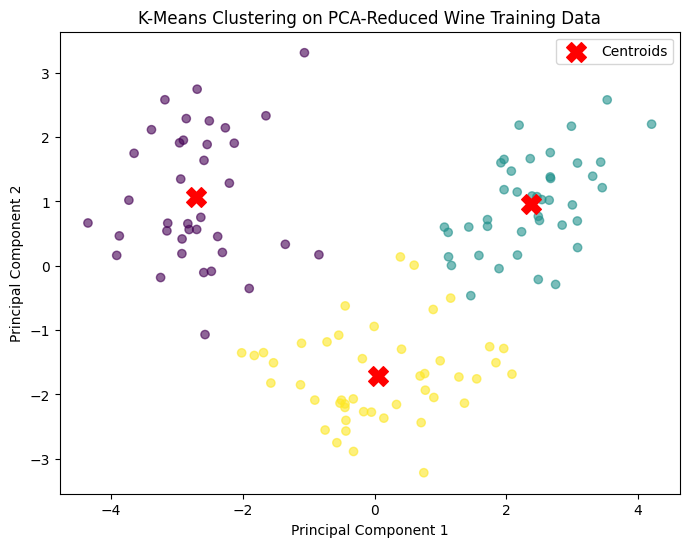

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels_train, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Wine Training Data')
plt.legend()
plt.show()

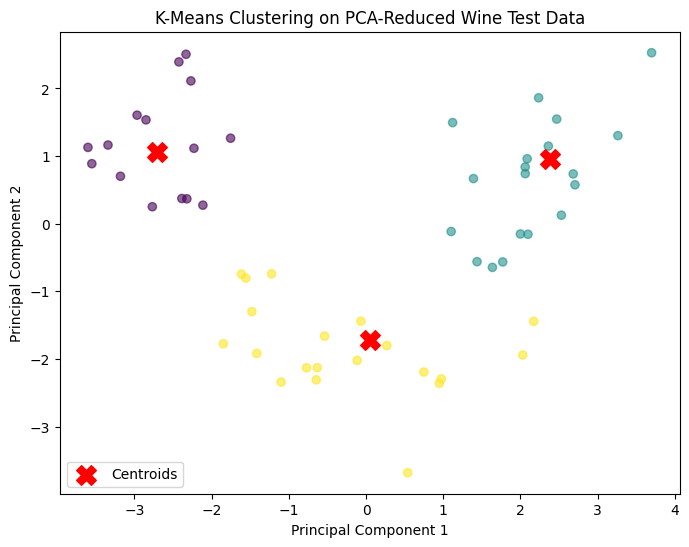

In [16]:
# 테스트 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=kmeans_labels_test, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Wine Test Data')
plt.legend()
plt.show()


# Kernel PCA
- Kernel PCA는 비선형 차원 축소 방법으로, 커널 기법을 사용하여 고차원 특징 공간에서 데이터를 비선형적으로 분리합니다.

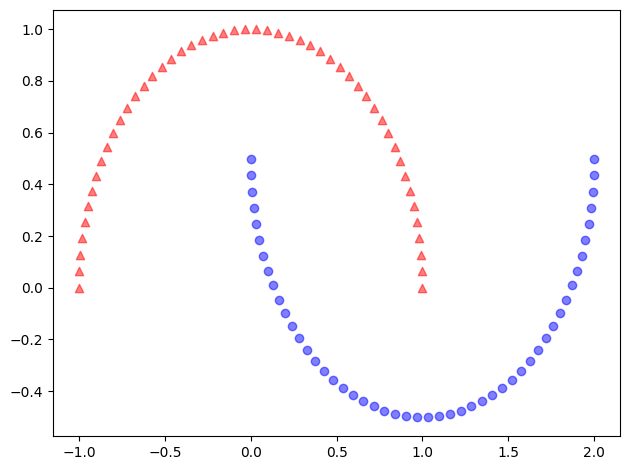

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

이 코드는 **Kernel PCA (커널 주성분 분석)**를 사용하여 비선형 차원 축소를 수행하고, 그 결과를 두 가지 방식으로 시각화하는 예제입니다. 이 예제에서 사용된 커널은 RBF (Radial Basis Function) 커널입니다.
- gamma=15는 RBF 커널의 파라미터로, 커널의 영향을 미치는 범위를 조정합니다.(커널함수의 폭)  
- k(x,x') = exp(-gamma * [x,x'])
- 큰 gamma 값 (overfitting): gamma가 큰 값일수록 커널의 영향 범위가 좁아집니다. 이는 데이터 포인트들 간의 유사도가 더 민감하게 계산되어, 가까운 데이터 포인트에만 영향을 미친다는 의미입니다. 따라서, 매우 가까운 데이터 포인트들만 유사한 것으로 간주하게 됩니다.

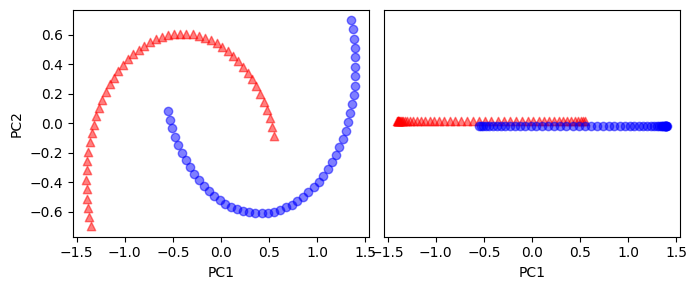

In [18]:
from sklearn.decomposition import PCA

import numpy as np
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

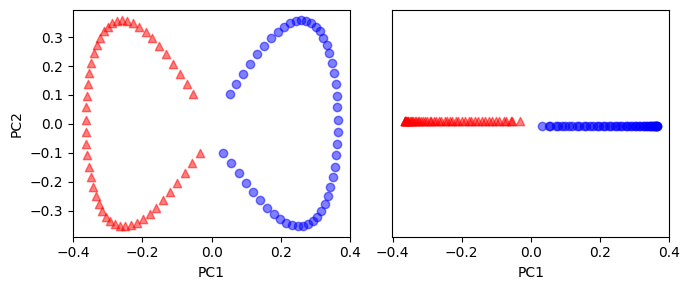

In [19]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca=kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

## circle data example

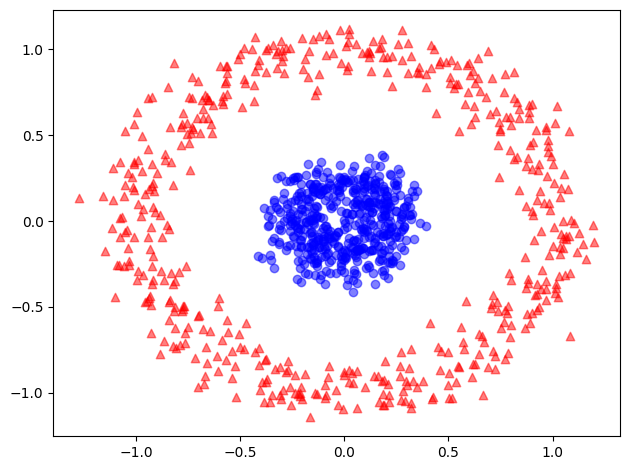

In [20]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

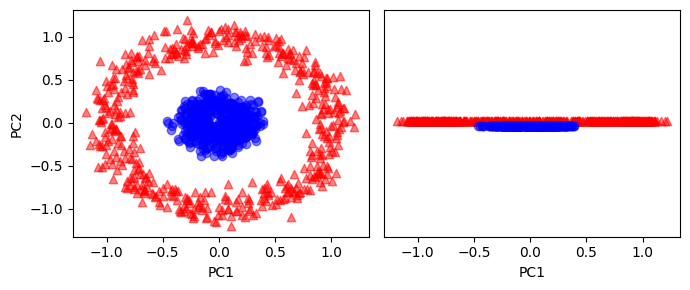

In [21]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

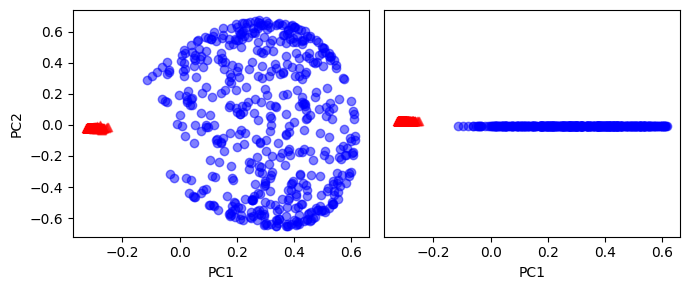

In [22]:
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca=kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

# Manifold Learning

In [23]:
from sklearn.manifold import MDS #(Multidimensional Scaling)

mds = MDS(n_components=2, random_state=42) #축소된 차원의 수
X_reduced_mds = mds.fit_transform(X)

from sklearn.manifold import Isomap  #Isometric Mapping

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

from sklearn.manifold import TSNE #(t-distributed Stochastic Neighbor Embedding)

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


- MDS (다차원 스케일링)
  - 다차원 스케일링은 데이터 포인트 간의 거리를 보존하면서 고차원 데이터를 저차원으로 축소
  - 주어진 데이터의 유사성을 보존하는 2차원 혹은 3차원 표현을 찾는 데 사용됨
  - 데이터 선형성 가정
- Isomap (등거리 사상):
  - Isomap은 다차원 데이터의 내재된 기하학적 구조를 재구성하는 비선형 차원 축소 기법
  - 데이터 포인트 사이의 지오데식 거리를 보존하여 저차원 매니폴드를 추정
- t-SNE (t-분산 확률적 이웃 임베딩):
  - t-SNE는 고차원 데이터의 구조를 시각화하기 위해 널리 사용되는 비선형 차원 축소 기법.
  - 비슷한 데이터 포인트는 저차원 표현에서 더 가깝게 매핑되고, 서로 다른 데이터 포인트는 멀어지도록 함.
  - 거리 보존 x
- LDA (선형 판별 분석):
  - LDA는 지도 학습 알고리즘으로, 클래스 간의 분리를 최대화하고 클래스 내의 분산을 최소화
  - 데이터를 저차원으로 투영. 주로 분류 문제에서 활용

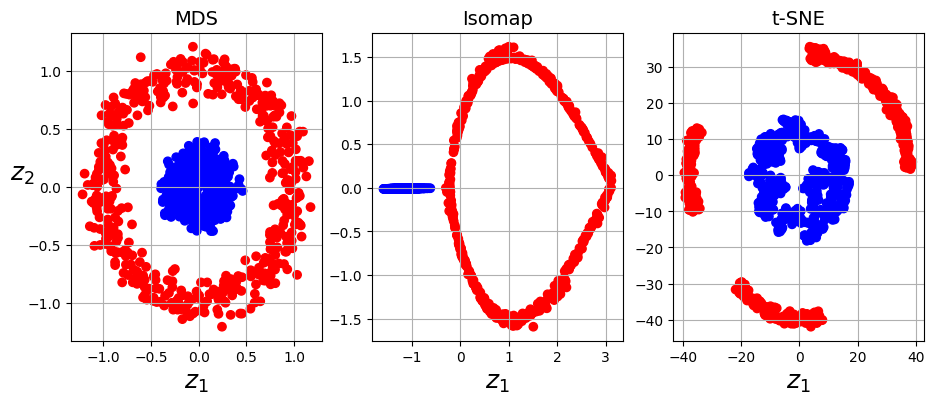

In [24]:
import matplotlib
titles = ["MDS", "Isomap", "t-SNE"]
colors = ["red", "blue"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()